In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


[*********************100%***********************]  4 of 4 completed


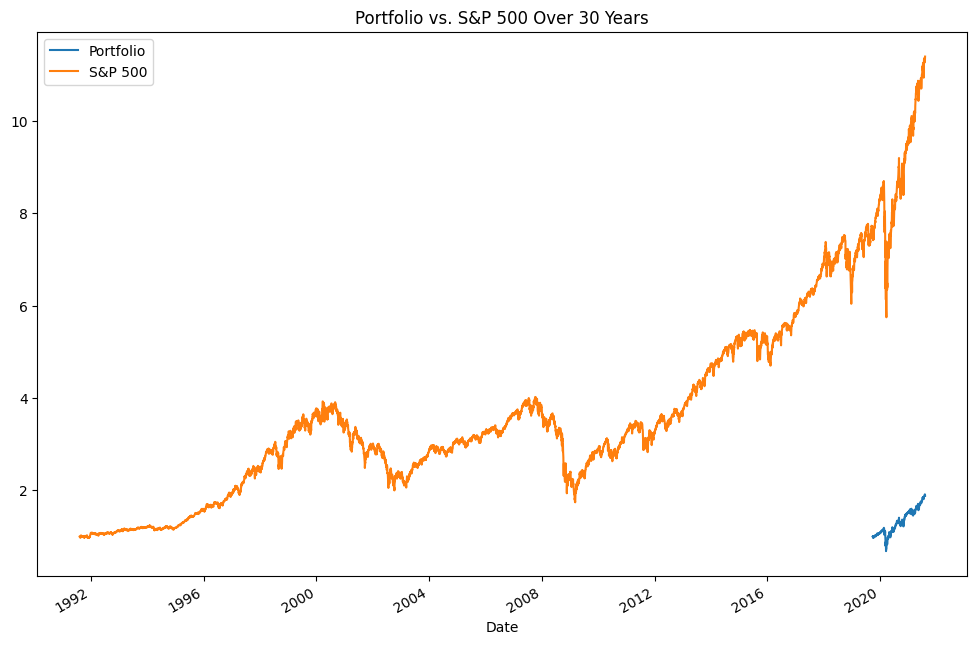

In [3]:
# Define the tickers
tickers = ["UPRO", "AVUV", "TMF", "^GSPC"]

# Fetch data from Yahoo Finance
start_date = "1991-08-08"  # 30 years from the current date
end_date = "2021-08-08"
data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
daily_returns = data.pct_change()

# Define portfolio weights (e.g., equally weighted)
weights = [1/3, 1/3, 1/3]

# Calculate portfolio returns
daily_returns["Portfolio"] = daily_returns[tickers[:-1]].dot(weights)

# Calculate cumulative returns
cumulative_returns = (daily_returns + 1).cumprod()
cumulative_returns["S&P 500"] = cumulative_returns["^GSPC"]
cumulative_returns["Portfolio"].plot(figsize=(12,8), label="Portfolio")
cumulative_returns["S&P 500"].plot(label="S&P 500")
plt.legend()
plt.title("Portfolio vs. S&P 500 Over 30 Years")
plt.show()


[*********************100%***********************]  4 of 4 completed


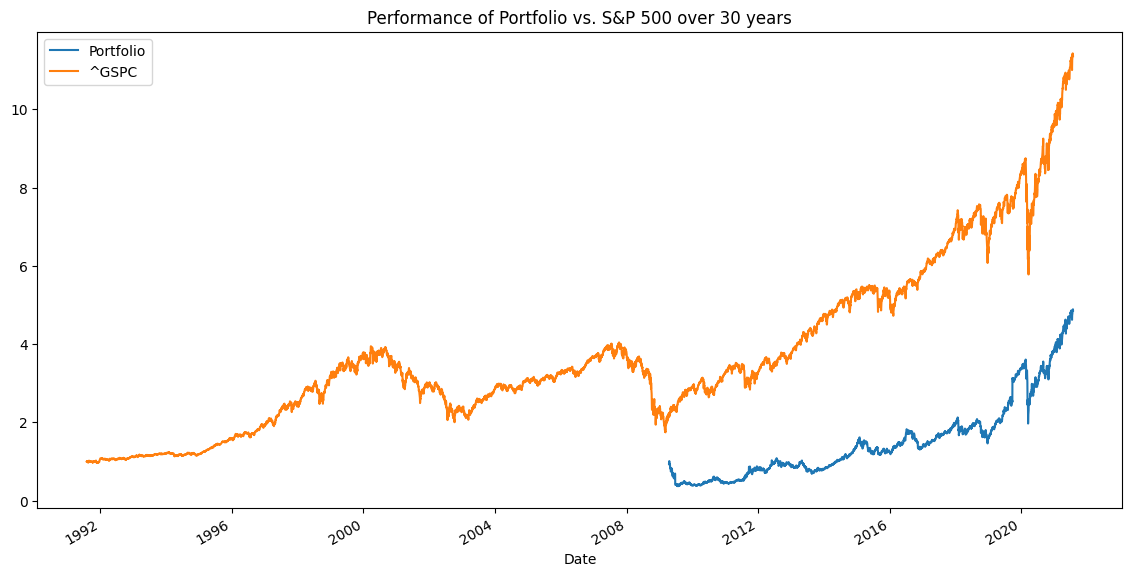

In [5]:
# Step 1: Data Retrieval
start_date = "1991-08-01"  # Adjust the start date accordingly
end_date = "2021-08-01"    # Adjust the end date accordingly

tickers = ['UPRO', 'AVUV', 'TMF', '^GSPC']
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Fill any missing data via forward filling
data = data.ffill()

# Step 2: Strategy - Equal Weighted Portfolio
data['Portfolio'] = data[['UPRO', 'AVUV', 'TMF']].mean(axis=1)

# Calculate daily returns
data_returns = data.pct_change()

# Step 3: Backtesting - Cumulative Returns
data_returns_cum = (1 + data_returns).cumprod()

# Step 4: Visualization
data_returns_cum[['Portfolio', '^GSPC']].plot(figsize=(14,7))
plt.title('Performance of Portfolio vs. S&P 500 over 30 years')
plt.show()


[*********************100%***********************]  4 of 4 completed


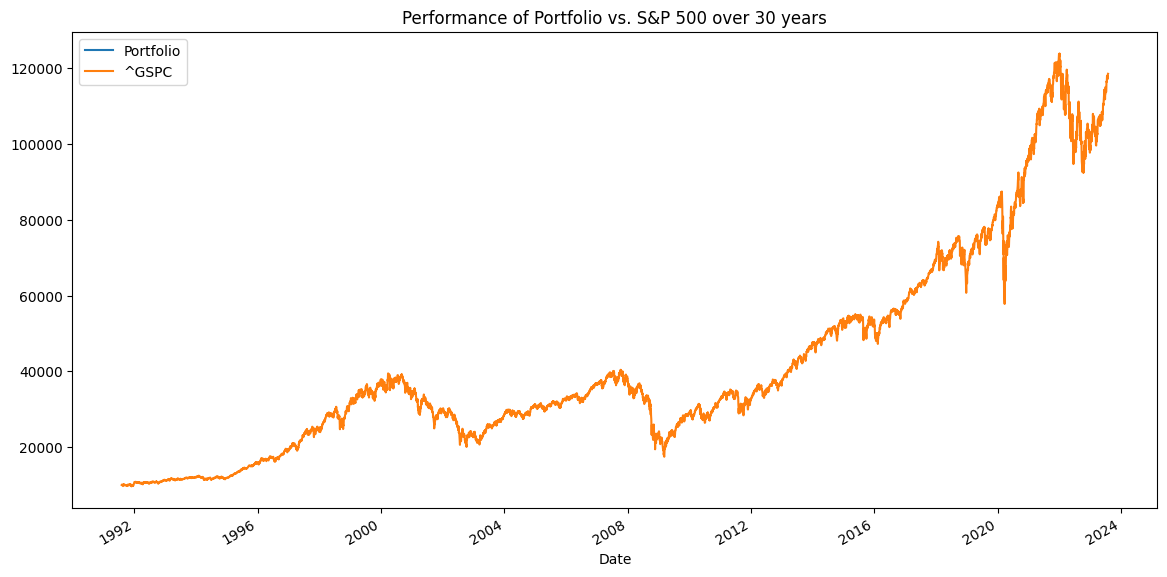

In [7]:
start_date = "1991-08-01"  
end_date = "2023-08-01"    

tickers = ['UPRO', 'AVUV', 'TMF', '^GSPC']
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Fill any missing data via forward filling
data = data.ffill()

# Step 2: Strategy - Equal Allocation of Funds
initial_investment = 10000
allocated_money_per_etf = initial_investment / 3

# Number of shares of each ETF bought initially
shares = allocated_money_per_etf / data.iloc[0][['UPRO', 'AVUV', 'TMF']]

# Calculate daily portfolio value
data['Portfolio'] = data[['UPRO', 'AVUV', 'TMF']].multiply(shares.values).sum(axis=1)

# Step 3: Backtesting - Calculate daily returns and cumulative returns
data_returns = data[['Portfolio', '^GSPC']].pct_change()
data_returns_cum = (1 + data_returns).cumprod() * initial_investment

# Step 4: Visualization
data_returns_cum.plot(figsize=(14,7))
plt.title('Performance of Portfolio vs. S&P 500 over 30 years')
plt.show()


## Dollar Cost Averaging vs Lump-Sum

[*********************100%***********************]  1 of 1 completed


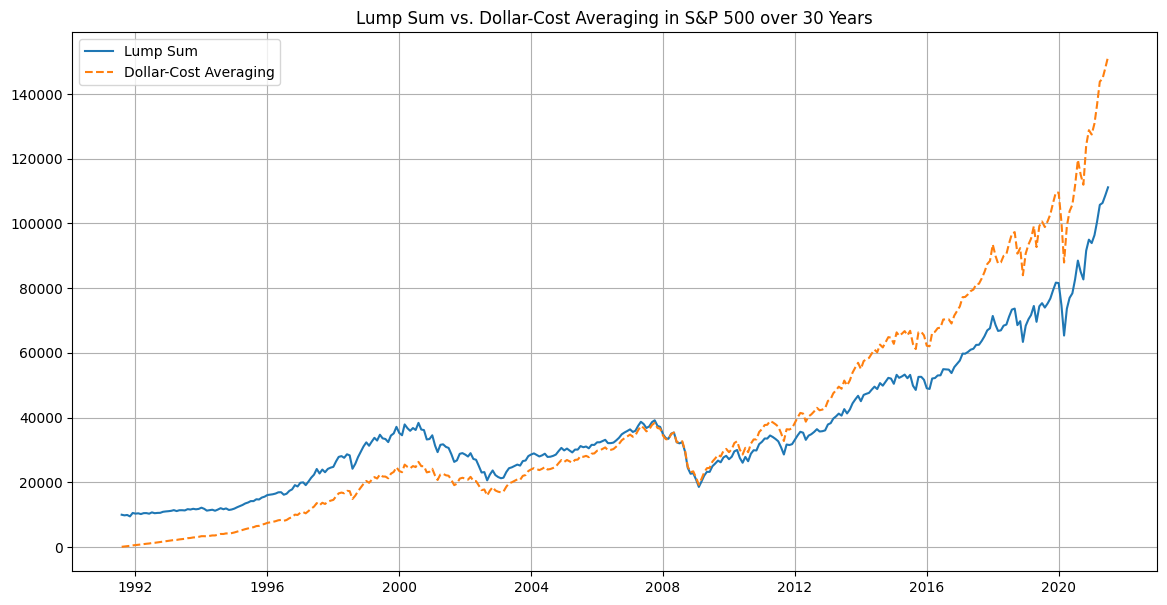

In [10]:
# Step 1: Data Retrieval
start_date = "1991-08-01"
end_date = "2021-08-01"

data = yf.download('^GSPC', start=start_date, end=end_date, interval="1mo")['Adj Close']
data = data.dropna()  # Drop any NaN values

# Step 2: Lump-Sum Investing
lump_sum_investment = 10000
lump_sum = data / data.iloc[0] * lump_sum_investment

# Step 3: Dollar-Cost Averaging
monthly_investment = 100
shares_bought = monthly_investment / data  # Shares bought every month
cumulative_shares = shares_bought.cumsum()  # Cumulative sum of shares
dca = cumulative_shares * data

# Step 4: Visualization
plt.figure(figsize=(14,7))
plt.plot(lump_sum, label='Lump Sum')
plt.plot(dca, label='Dollar-Cost Averaging', linestyle='--')
plt.title('Lump Sum vs. Dollar-Cost Averaging in S&P 500 over 30 Years')
plt.legend()
plt.grid(True)
plt.show()